# Loan Class Visualizations

*The following notebook explains the function of the starting loan class and breaks down each of its functions*

## Attributes

The loan class is the base class for all loans in the simulation and initialized with the following attributes:

- **`id` (str)**:
  - Unique identifier for the loan.
  
- **`maturity` (int)**:
  - Number of cycles until the loan matures.
  
- **`current_cycle` (int)**:
  - The current cycle of the simulation.
  
- **`starting_cycle` (int)**:
  - The cycle when the loan was initiated.
  
- **`ending_cycle` (int)**:
  - The cycle when the loan will end.
  
- **`time_to_maturity` (int)**:
  - Number of cycles until the loan matures.
  
- **`pd` (float)**:
  - Probability of default for the loan.
  
- **`size` (float)**:
  - Size of the loan.
  
- **`interest_rate` (float)**:
  - Interest rate of the loan.
  
- **`fair_value` (float)**:
  - Fair value of the loan.
  
- **`market_price` (float)**:
  - Market price of the loan.
  
- **`current_owner` (str)**:
  - The current owner of the loan.
  
- **`maturity_bool` (bool)**:
  - Indicates if the loan has matured.
  
- **`fair_value_history` (list)**:
  - History of the loan's fair values.
  
- **`market_price_history` (list)**:
  - History of the loan's market prices.
  
- **`ownership_history` (list)**:
  - History of the loan's ownership.

### Methods

---

#### `__init__(self, current_cycle=0, current_owner="no owner")`

Initializes the Loan with random values for its attributes.

- **Parameters**:
  - `current_cycle` (int, default = 0): The current cycle of the simulation.
  - `current_owner` (str, default = "no owner"): The initial owner of the loan.

**Attribute Initializations**:
  - `maturity`: Generated randomly using a uniform distribution, $\( U(3 \times 12, 8 \times 12) \)$.
  - `pd`: Generated using a beta distribution, $\( \text{Beta}(1, 50) \)$.
  - `size`: Generated using a uniform distribution, $\( U(500,000, 5,000,000) \)$.

---

#### `generate_interest_rate(self)`

Generates a random interest rate based on some factors and noise.

- **Returns**:
  - A float representing the generated interest rate.

**Interest Rate Calculation**:
  - Base noise component: $\( \mathcal{N}(0.02, 0.005) \)$
  - Correlation with probability of default: $\( \text{correlation\_factor} \times \text{pd} \times \text{influence\_factor} \)$

---

#### `calculate_price(self)`

Calculates the price of the loan based on its attributes.

- **Returns**:
  - A float representing the calculated price of the loan.

**Price Calculation Influences**:
  - Probability of Default (pd) effect is doubled for loans with a PD of greater than 20%: 
    - $\( -7 \times \text{pd} \)$ if $\( \text{pd} \leq 0.2 \)$
    - $\( -14 \times \text{pd} \)$ otherwise
  - Interest Rate (ir) effect: $\( 5 \times \text{interest\_rate} \)$
  - Size effect: $\( -0.0000002 \times \text{size} \)$

---

#### `generate()`

Static method to generate a new `Loan` instance.

- **Returns**:
  - A new `Loan` object.

---

#### `update_owner(self, new_owner)`

Updates the current owner of the loan.

- **Parameters**:
  - `new_owner` (str): The new owner of the loan.

---

#### `update(self, current_cycle, new_owner=None, new_market_price=None)`

Updates the loan's attributes for a new cycle. If the loan has matured, checks for default and adjusts fair value and market price accordingly.

- **Parameters**:
  - `current_cycle` (int): The new current cycle.
  - `new_owner` (str, optional): The new owner of the loan, if it has changed.
  - `new_market_price` (float, optional): The new market price of the loan, if it has changed.

**Maturity Logic**:
  - If the loan has matured:
    - Checks for default using a random value: $\( \text{default\_outcome} = \text{Random} < \text{pd} \)$
    - If default occurs: 
      - Fair value and market price are set based on a normal distribution: $\( \mathcal{N}(10, 2) \)$
    - Otherwise:
      - Fair value and market price are set to 100 (par value).

/Users/mithil/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


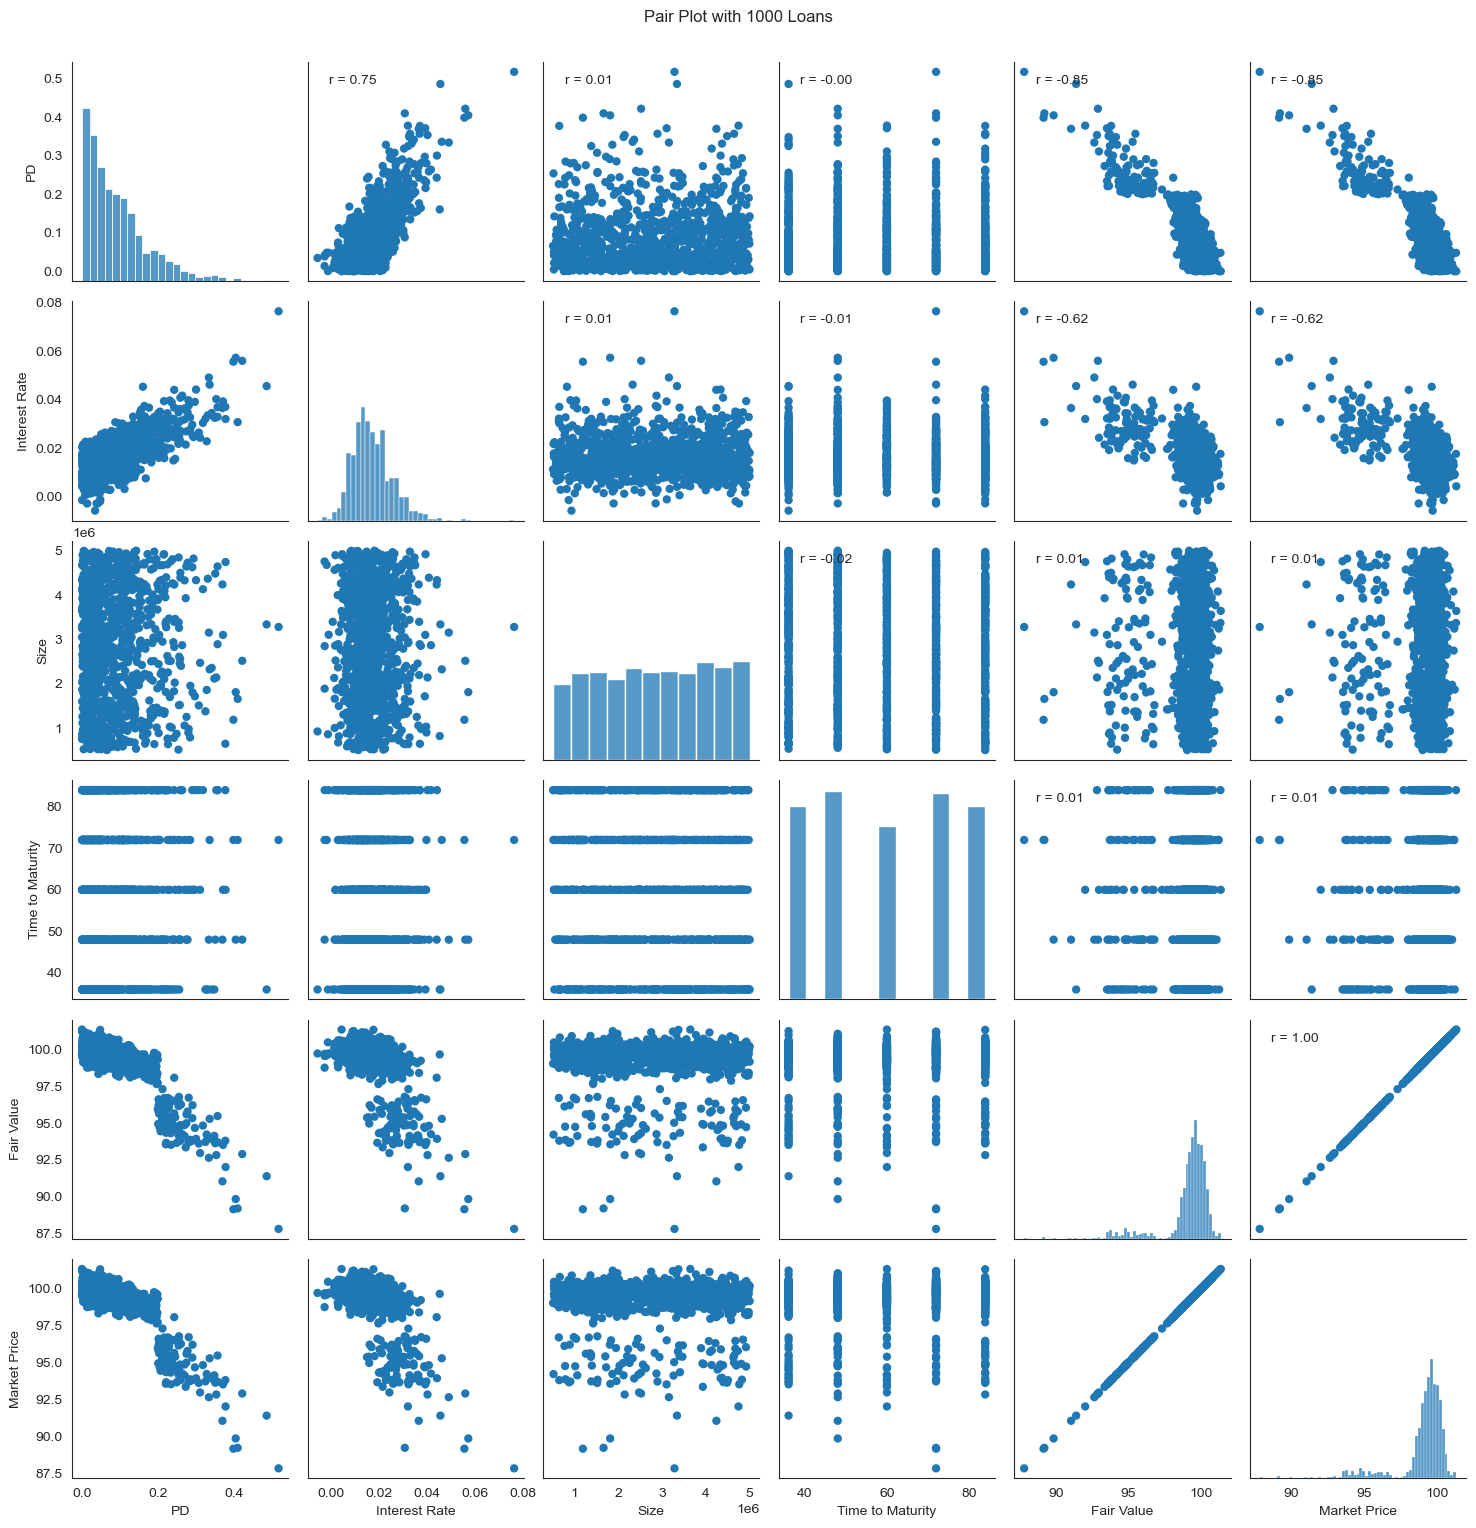

In [1]:
import Agents.Loan as Loan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def corr_annotate(x, y, **kws):
    r = np.corrcoef(x, y)[0, 1]
    ax = plt.gca()
    ax.annotate(f"r = {r:.2f}", xy=(.1, .9), xycoords=ax.transAxes)

# Regenerate the loans with a sample size of 50 and extract their attributes for pair plot
loan_num = 1000

loans = [Loan.LoanObj.generate() for _ in range(loan_num)]
attributes = {
    "PD": [loan.pd for loan in loans],
    "Interest Rate": [loan.interest_rate for loan in loans],
    "Size": [loan.size for loan in loans],
    "Time to Maturity": [loan.time_to_maturity for loan in loans],
    "Fair Value": [loan.fair_value for loan in loans],
    "Market Price": [loan.market_price for loan in loans]
}

df_loans_updated = pd.DataFrame(attributes)

# Create the pair plot without gridlines and with circle markers
sns.set_style("white")
grid = sns.pairplot(df_loans_updated, plot_kws={"edgecolor": "none", "marker": "o"})
grid.map_upper(corr_annotate)
plt.suptitle("Pair Plot with "+str(loan_num)+" Loans", y=1.02)
plt.show()

## Updating logic of loans

Loan Attributes {'id': 'fc0ab400-9f84-4816-a7f0-df2cef380cb6', 'maturity': 72, 'current_cycle': 0, 'starting_cycle': 0, 'ending_cycle': 72, 'time_to_maturity': 72, 'pd': 0.1369028057297397, 'size': 1859482.2353130335, 'base_interest_rate': 0.02274629376221586, 'interest_rate': 0.07274629376221586, 'fair_value': 100.12831220488845, 'market_price': 100.12831220488845, 'current_owner': 'no owner', 'maturity_bool': False, 'fair_value_history': [100.12831220488845], 'market_price_history': [100.12831220488845], 'ownership_history': ['no owner'], 'sale_price_history': [None], 'reserve_price': 80.10264976391076}


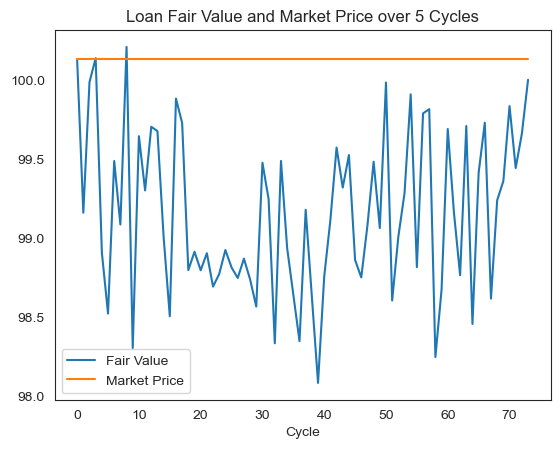

In [2]:
import Agents.Loan as Loan

# Create a loan with a maturity of 5 cycles
loan = Loan.LoanObj(float_interest=0.05)

print("Loan Attributes", loan.as_dict())

# Update the loan for 5 cycles
for i in range(200):
    loan.update(i)

plt.plot(loan.fair_value_history, label="Fair Value")
plt.plot(loan.market_price_history, label="Market Price")
plt.title("Loan Fair Value and Market Price over 5 Cycles")
plt.xlabel("Cycle")
plt.legend()